# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Here, we dive deep into a hospital dataset collected for the different patients who made appointments and their characteristics. We are particularly interested inwhy people show up or don't show up to appointments in the hospital, and we'll be looking at if the characteristics of the patients is what made them show up or don't show up for appointments.

OBSERVATIONS - 
01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.


### Question(s) for Analysis
1. Does increase in age lead to increase in showing up for appointment?
2. Does the days of waiting lead to less showing up for appointment?
3. Do patient with schorlarships show up more to appointments?
4. Do people that receive SMS text show up more to appointments?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# I loaded the no show database directly from the kaggle website and had a look at it
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Get the rows and columns of the data
df.shape

(110527, 14)

In [5]:
# i get a brief summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Removed the appointmentid and patient id column as they would not be relevant in answering my questions
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [8]:
df.shape

(110527, 12)

In [9]:
#access the data
df.duplicated().sum()

635

In [10]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

Now the dataframe has no null values. The appointment and patient ID column has also been removed


### Data Cleaning


In [12]:
# drop duplicate values
df = df.drop_duplicates()

In [13]:
df.shape

(109892, 12)

In [14]:
# rename all the column labels with lowercase letters
df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# convert the data type of the appointment and schedule day from object to datetime datatype
df.appointmentday = pd.to_datetime(df.appointmentday)
df.scheduledday = pd.to_datetime(df.scheduledday)

df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

In [16]:
# correct the handcap column name to handicap
df.rename(columns={'handcap': 'handicap'}, inplace = True)

In [17]:
# replace the yes and no string values of the no_show column to 0 and 1 int values
df.loc[df.no_show == 'Yes', 'no_show'] = 1
df.loc[df.no_show == 'No', 'no_show'] = 0
df.no_show = df.no_show.astype(int)
print(df.no_show.unique())
df.dtypes

[0 1]


gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                         int32
dtype: object

In [18]:
# derive the time of waiting in days
wait_days = df.appointmentday.dt.date - df.scheduledday.dt.date
wait_days = wait_days.dt.days
df.insert(3, 'wait_days', wait_days)

In [19]:
df.head()

,gender,scheduledday,appointmentday,wait_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [20]:
# clean age column
df = df.query('age >= 0')

In [21]:
# clean handicap column
print(df.handicap.unique())
# df['handicap'] = df['handicap'].apply(lambda x: 1 if x >= 1 else 0)
df.loc[df['handicap'] >= 1, 'handicap'] = 1
print(df.handicap.unique())

[0 1 2 3 4]
[0 1]


In [22]:
#clean wait days columns
df = df.query('wait_days >= 0')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109886 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          109886 non-null  object             
 1   scheduledday    109886 non-null  datetime64[ns, UTC]
 2   appointmentday  109886 non-null  datetime64[ns, UTC]
 3   wait_days       109886 non-null  int64              
 4   age             109886 non-null  int64              
 5   neighbourhood   109886 non-null  object             
 6   scholarship     109886 non-null  int64              
 7   hipertension    109886 non-null  int64              
 8   diabetes        109886 non-null  int64              
 9   alcoholism      109886 non-null  int64              
 10  handicap        109886 non-null  int64              
 11  sms_received    109886 non-null  int64              
 12  no_show         109886 non-null  int32              
dtypes: datetime64[

In [24]:
df.head()

,gender,scheduledday,appointmentday,wait_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis
 

### Research Question 1 (Does increase in age lead to increase in showing up for appointment?)

It is only ideal that we perform analysis to determine if age is a contributing factor to the no-show of patients.The patients are made up of various ages. we want  to see if patients with similarities in their ages are showing up to hospital appointments

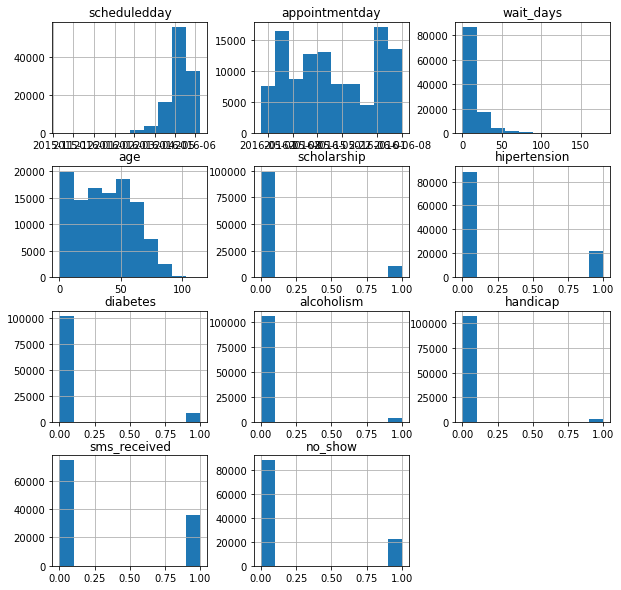

In [25]:
# explore the columns with integer values individually with a histogram plot
df.hist(figsize = (10,10));

In [26]:
# create a filter/mask for the no_show column to seperate the shows from the noshows
show = df.no_show == True
nshow = df.no_show == False

This show and no-show mask/filter will be very key in my analysis as I'll will be using the show mask when I want to get only rows where patients showed up and I'll be using the nshow mask when i want to get only rows where patients did not show up.

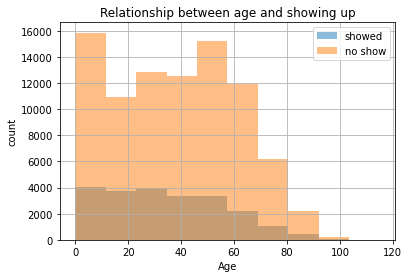

In [27]:
# plot a histogram to show the patients of all ages that showed and that did not show
df.age[show].hist(alpha = 0.5, label = 'showed')
df.age[nshow].hist(alpha = 0.5, label = 'no show')
plt.title('Relationship between age and showing up')
plt.xlabel('Age')
plt.ylabel('count')

plt.legend();

For this question, i had to find the distribution the patient's ages that showed up and the distribution of patient's ages that did not show up with a histogram. this is significant as i was able to see the ages that showed up the most, the ages that showed up the least, the ages that did not show up the most and the ages that did not show up the least. The count/number is on the y-axis and the age range is on the  x-axis.

From the visualization above, we can see that ages 0 - 10 were the most no-shows, as they were more than 14,000 in number. Ages 25-35 were tied with ages 0-10 for most shows, as they were 4,000 in number

It can be seen that an incerased age does not mean that patients will show up, neither does it mean that they will not show up.

### Research Question 2  (Does the days of waiting lead to less showing up for appointment?)

At times, for the impatient ones, waiting can seem impossible. And as a result, they may end up not doing something because of how long they have to wait. This is why I've derived the wait time in days from the columns given in the dataset as I'll set out to find out if patients do not show up because of the wait period.

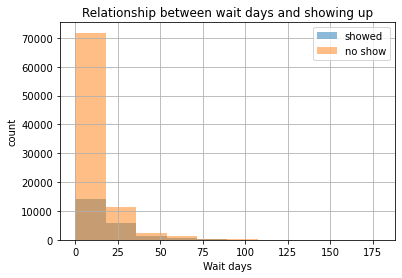

In [28]:
df.wait_days[show].hist(alpha = 0.5, label = 'showed')
df.wait_days[nshow].hist(alpha = 0.5, label = 'no show')
plt.title('Relationship between wait days and showing up')
plt.xlabel('Wait days')
plt.ylabel('count')
plt.legend();

For this question, i had to find the distribution the patient's wait days that showed up and the distribution of patient's wait days that did not show up with a histogram. This helped me to see the least days patients can wait and the number of patients that waited that long, and the most days a patient can wait and the number of patients that waited that long.The number/count is on the y-axis and the range of wait days is on the x-axis. 

From this visualization, we can see that almost all patients did not have to wait more than 0- 25 days. Since the wait days was mostly less, it did not stop the patients from not showing as more than 70,000 with wait days less tha 25 days did not shpw up, which pales in comparison to the less than 20,000 patients that showed up when given the same waiit days.

few Patients with low wait days showed up and many patients with low wait days did not show up.

### Research Question 3  (Do patient with schorlarships show up more to appointments?)

Having gotten schorlarship, which may lighten the financial burden on some patients, the aim of this question is to find out if will show up to their hospital appointments.

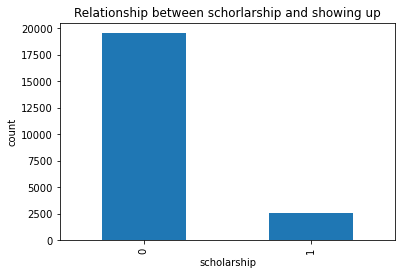

In [46]:
df.scholarship[show].value_counts().plot(kind = 'bar')
plt.title('Relationship between schorlarship and showing up')
plt.xlabel('scholarship')
plt.ylabel('count');

In order to answer this question, i plottted a bar graph to compare the number of patients who had scholarship and showed to the number of patients who did not have scholarship and showed up to the hospital appointment.With this plot. The count/number of patients is on the y-axis and the scholarship groups of 0 and 1 is on the x-axis, where 0 is for patients that do not have scholarship and 1 is for patients that have scholarship.

The plot clearly shows that there were almost 20,000 people without scholarship who showed up and there were 2,500 patients with schorlarship who showed up.

Clearly, schorlarship is not a reason for not showing up as more patients without scholarship showed up than the ones with schorlarship.

### Research Question 4  (Do people that receive SMS text show up more to appointments?)

SOmetimes, patients may forget that they've booked hospital appointments, and a simple reminder will help them rememmber. The significance of this question is to find out if the hospital sms sent to the patients with hospital appointments was effective. 

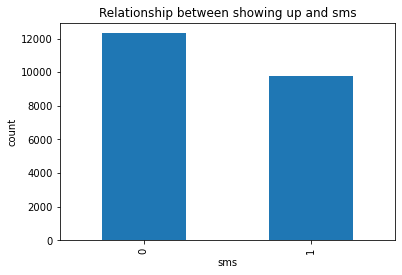

In [52]:
df.sms_received[show].value_counts().plot(kind = 'bar')
plt.title('Relationship between showing up and sms')
plt.xlabel('sms')
plt.ylabel('count');

For this question, i plottted a bar graph to compare the number of patients who had received sms and showed to the number of patients who did not receive sms and showed up to the hospital appointment.The count/number of patients is on the y axis and the sms group made up of 0 and 1 is on the x axis. 0 is for the group that did not receive sms and 1 is for the group that received sms. 

From the plot, there are more than 12,000 who did not receive sms that showed up for the appointment and there are almost 10,000 that received the sms and showed up to the appointment. This means that the patients that showed up to the appointmenmt were mostly patients who had not received the sms text, and only few patients who received sms showed up to appoinbtments.

Sms did not contribute to patients showing up as Patients that did not receive sms still showed up more than the ones that received.

<a id='conclusions'></a>
## Conclusions

1.The number of people that did not show up reduced from 60 years and above, so did the number of people that showed up.

2.Increase in wait time had no effect on the patients that showed up as there were more people with 0 waiting time that did not show up compared to the ones thst showed.

3.Patients with schorlarships showed up less than patients without schorlarship

4.Patients that received sms text showed up hess than patients who did not receive sms.
    

Additional analysis can be done on the diseases and the location columns to find out if they play a crucial role in the no show of patients at the hospital for appointments

<a id='conclusions'></a>
## Limitations

1. Rows with duplicate values were dropped
2. the appointmentid and the patientid columns were removed as they were no relevant.
3. Rows with ages less than 0 were removed as they made no sense.
4. The wait_days columns had values less than zero which made no sense, hence, those rows were dropped.

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295